In [ ]:
#Imports
from math import *                                                             
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import scipy

In [ ]:
# RECEBER OS DADOS:
print("Dados 1")
Trabalho1 = {"m":3.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 2")
Trabalho2 = {"m":4.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 3")
Trabalho3 = {"m":6.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 4")
Trabalho4 = {"m":7.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados cimento")
DadosCimento = {"MassaEspecifica":float(input("Massa especifica")), "Custo":float(input("Custo"))}
#Dados Fornecidos
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

Dados 1
Relaçãoa/c0.41
Resistencia28C160.2
Resistencia28C258.9
Dados 2
Relaçãoa/c0.54
Resistencia28C143.2
Resistencia28C241.5
Dados 3
Relaçãoa/c0.68
Resistencia28C129.5
Resistencia28C231.3
Dados 4
Relaçãoa/c0.83
Resistencia28C119.3
Resistencia28C221.3
Dados cimento
Massa especifica3.03
Custo600


[0.41 0.41 0.54 0.54 0.68 0.68 0.83 0.83]


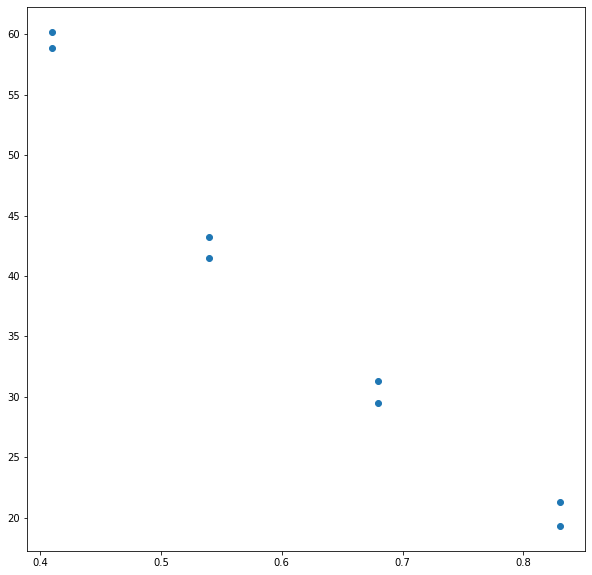

In [ ]:
#UNIR EM UM ARRAY 
Dadosac = np.array((float(Trabalho1["Relaçãoa/c"]),float(Trabalho1["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"])))
DadosRes = np.array((float(Trabalho1["Resistencia28C1"]),float(Trabalho1["Resistencia28C2"]),float(Trabalho2["Resistencia28C1"]),float(Trabalho2["Resistencia28C2"]),float(Trabalho3["Resistencia28C1"]),float(Trabalho3["Resistencia28C2"]),float(Trabalho4["Resistencia28C1"]),float(Trabalho4["Resistencia28C2"])))
Dadosm = np.array((float(Trabalho1["m"]),float(Trabalho1["m"]),float(Trabalho2["m"]),float(Trabalho2["m"]),float(Trabalho3["m"]),float(Trabalho3["m"]),float(Trabalho4["m"]),float(Trabalho4["m"])))
#Plotar os dados fornecidos de resistencia a/c
plt.figure(figsize=(10,10))
plt.scatter(Dadosac,DadosRes)
print(Dadosac)

In [ ]:
AP = ['A', 'P']
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

In [ ]:
#CLASSES DE AGRESSIVIDADE
ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}
ClassesAgr = [ClasseI,ClasseII,ClasseIII,ClasseIV]
#ADITIVO X REDUCAO DA QUANTIDADE DE AGUA
Aditivo  = [0.002, 0.004, 0.006, 0.008, 0.01]
RedAgua = [0.08, 0.09, 0.11, 0.13, 0.16] 
MEaditivo = 1.2
Custoaditivo = 6

In [ ]:
#FIT DA CURVA LOGARITIMICA
Dadosacfit = np.copy(Dadosac)
Dadosacfit = Dadosacfit.reshape((8,1))
constantes = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  Dadosac,  DadosRes)

In [ ]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
soma1 = 0
MediaRes = np.sum(DadosRes)
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)


R2 =  0.9634397365831551


In [ ]:
print(constantes[0][0], constantes[0][1])

9.30177448594416 -55.48332341823097


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Fck28')

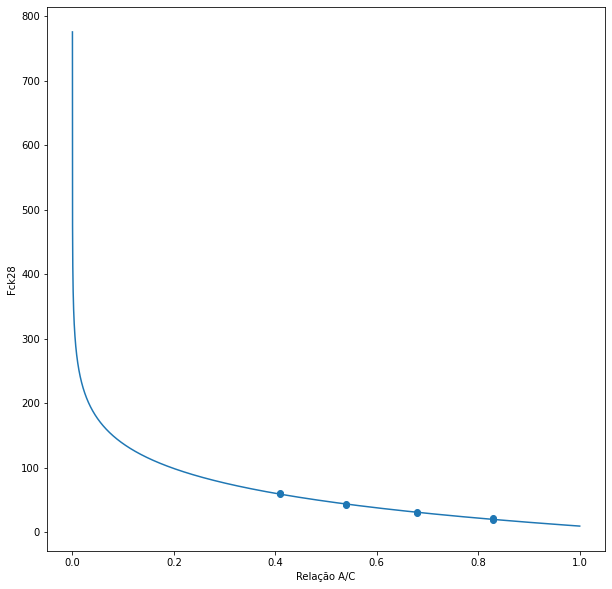

In [ ]:
#PLOT DA CURVA
xfit = np.arange(0,1,0.000001)
yfit = constantes[0][0] + constantes[0][1]*np.log(xfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(Dadosac,DadosRes)
plt.xlabel('Relação A/C')
plt.ylabel('Fck28')

Text(0, 0.5, 'Fck28')

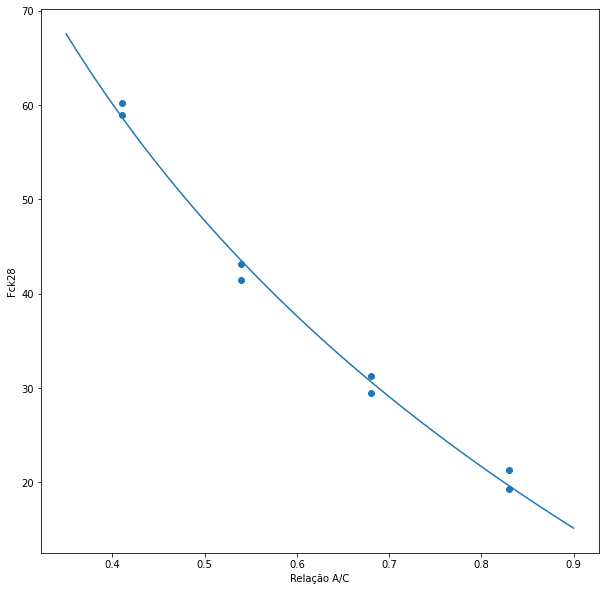

In [ ]:

#PLOT DA CURVA COM ZOOM
xzoomfit = np.arange(0.35,0.9,0.0002)
yzoomfit = constantes[0][0] + constantes[0][1]*np.log(xzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(Dadosac,DadosRes)
plt.xlabel('Relação A/C')
plt.ylabel('Fck28')

In [ ]:
#TESTE A/C FCM
Finalac = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        for idealac in range(0,1000000):
            if(yfit[idealac]>=ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"]):
              Finalac[i,j] = idealac/100000
            else:
              print('Classe',i+1,AP[j],'\n',"Resistencia obtida:",yfit[idealac],'A/c ideal:', idealac/1000000,'Resistencia minima:',ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])
              break

Classe 1 A 
 Resistencia obtida: 24.949961040593305 A/c ideal: 0.754248 Resistencia minima: 24.95
Classe 1 P 
 Resistencia obtida: 29.949961489383817 A/c ideal: 0.68925 Resistencia minima: 29.95
Classe 2 A 
 Resistencia obtida: 29.949961489383817 A/c ideal: 0.68925 Resistencia minima: 29.95
Classe 2 P 
 Resistencia obtida: 34.949984940842945 A/c ideal: 0.629853 Resistencia minima: 34.95
Classe 3 A 
 Resistencia obtida: 34.949984940842945 A/c ideal: 0.629853 Resistencia minima: 34.95
Classe 3 P 
 Resistencia obtida: 39.949971030788355 A/c ideal: 0.575575 Resistencia minima: 39.95
Classe 4 A 
 Resistencia obtida: 44.949898327497 A/c ideal: 0.525975 Resistencia minima: 44.95
Classe 4 P 
 Resistencia obtida: 44.949898327497 A/c ideal: 0.525975 Resistencia minima: 44.95


In [ ]:
print("Teste a/c maximo : a/c para resistencia minima")
for i in range(0,4):
    for j in range(0,2):
        if(Finalac[i,j]/10<=(ClassesAgr[i]["a/c"][j])):
            print("Aprovado")
            print('Classe', i, j,'apovado', Finalac[i,j],(ClassesAgr[i]["a/c"][j]))
        else:
            print('',Finalac[i,j]/10,(ClassesAgr[i]["a/c"][j]), yfit[int(ClassesAgr[i]["a/c"][j]*1000000)])
            Finalac[i,j] = ClassesAgr[i]["a/c"][j]*100

Teste a/c maximo : a/c para resistencia minima
 0.754247 0.65 33.203042342550454
 0.689249 0.6 37.644077779672195
 0.689249 0.6 37.644077779672195
 0.629852 0.55 42.47175815025344
 0.629852 0.55 42.47175815025344
 0.575574 0.5 47.75988368138654
 0.5259739999999999 0.45 53.60563524714131
 0.5259739999999999 0.45 53.60563524714131


[[65. 60.]
 [60. 55.]
 [55. 50.]
 [45. 45.]]


No handles with labels found to put in legend.


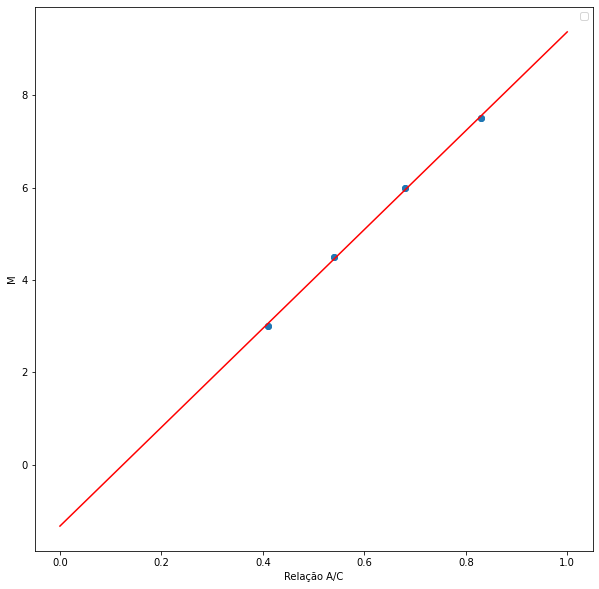

In [ ]:
print(Finalac)
import matplotlib.pyplot as plt
from scipy import stats
todosm = np.arange(0,10,0.000001)

plt.figure(figsize=(10,10))
res = stats.linregress(Dadosac, Dadosm)
x = np.arange(0,1,0.0000001)
mac = res.intercept + res.slope*x
macfinal = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        macfinal[i,j] = mac[int(100000*Finalac[i,j])]
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.xlabel('Relação A/C')
plt.ylabel('M')

plt.legend()
plt.scatter(Dadosac,Dadosm)
plt.show()

In [ ]:
macfinalshape = macfinal.reshape((8,1))
print(macfinal, res.intercept, res.slope)

[[5.62461774 5.08944954]
 [5.08944954 4.55428135]
 [4.55428135 4.01911315]
 [3.48394495 3.48394495]] -1.3325688073394506 10.70336391437309


In [ ]:
macfinalshape

array([[5.62461774],
       [5.08944954],
       [5.08944954],
       [4.55428135],
       [4.55428135],
       [4.01911315],
       [3.48394495],
       [3.48394495]])

In [ ]:
Somam = 0
for i in range(0,8):
  Somam = Somam + (Dadosm[i] - (res.intercept + res.slope*(Finalac[i//2,i%2]/10)))**2
  print(res.intercept + res.slope*(Finalac[i//2,i%2]/10))
soma1m = 0

Mediam = np.sum(Dadosm)
for i in range(0,8):
  soma1m = Somam + (Mediam/8 - Dadosm[i])**2
print('R2 = ', 1 - (soma1m - Somam)/soma1m)


5.624617737003058
5.089449541284403
5.089449541284403
4.55428134556575
4.55428134556575
4.019113149847095
3.4839449541284404
3.4839449541284404
R2 =  0.9078518862248957


In [ ]:
Areia = np.zeros((4,2))
Pedra = np.zeros((4,2))
for i in range (0, 4):
  for j in range(0, 2):
    Areia[i,j] = float(DdosExtras["TeorArgS"])*(1+ macfinal[i,j])- 1
    Pedra[i,j] = macfinal[i,j] - Areia[i,j]

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


In [ ]:
print(Areia)
print(Pedra)

[[2.64353976 2.34919725]
 [2.34919725 2.05485474]
 [2.05485474 1.76051223]
 [1.46616972 1.46616972]]
[[2.98107798 2.74025229]
 [2.74025229 2.49942661]
 [2.49942661 2.25860092]
 [2.01777523 2.01777523]]


In [ ]:
print(constantes[0][0], constantes[0][1])

9.30177448594416 -55.48332341823097


In [ ]:
for i in range(0,4):
    for j in range(0,2):
        print(ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])

24.95
29.95
29.95
34.95
34.95
39.95
44.95
44.95


In [ ]:
Areiateste = np.zeros(4)
Britateste = np.zeros(4)
m = [3, 4.5, 6, 7.5]
#acteste = [0.36,0.5,0.63,0.79] 
acteste = [0.41,0.54,0.68,0.83] 
for i in range (0, 4):
    Areiateste[i] = 0.55*(1 + m[i])- 1
    Britateste[i] = m[i] - Areiateste[i]
print(Areiateste, Britateste)

[1.2   2.025 2.85  3.675] [1.8   2.475 3.15  3.825]


In [ ]:
acteste

[0.36, 0.5, 0.63, 0.79]

In [ ]:
CC = np.zeros(4)
for i in range(0,4):
  CC[i] = 1000/((1/3.03)+(Areiateste[i]/2.63) + (Britateste[i]/2.95) + acteste[i])

In [ ]:
SomaCC = 0
for i in range(0,4):
  SomaCC = SomaCC + (Dadosm[i*2+1] - (constantesC[0][0] + constantesC[0][1]*np.log(m[i])))**2
soma1CC = 0
Mediam = np.sum(Dadosm)/2
for i in range(0,4):
  soma1CC = SomaCC + (Mediam - Dadosm[i*2+1])**2
print('R2 = ', 1-(soma1CC - SomaCC)/soma1CC)


R2 =  0.9352225052552321


In [ ]:
print(constantesC[0][0] , constantesC[0][1])
print(CC,m)

39.42758553062356 -5.767794467395216
[553.56387607 403.39203791 316.30757181 259.47192023] [3, 4.5, 6, 7.5]


In [ ]:
DadosCCfit = np.copy(CC)
constantesC = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  CC,m)

Text(0, 0.5, 'Consumo Cimento')

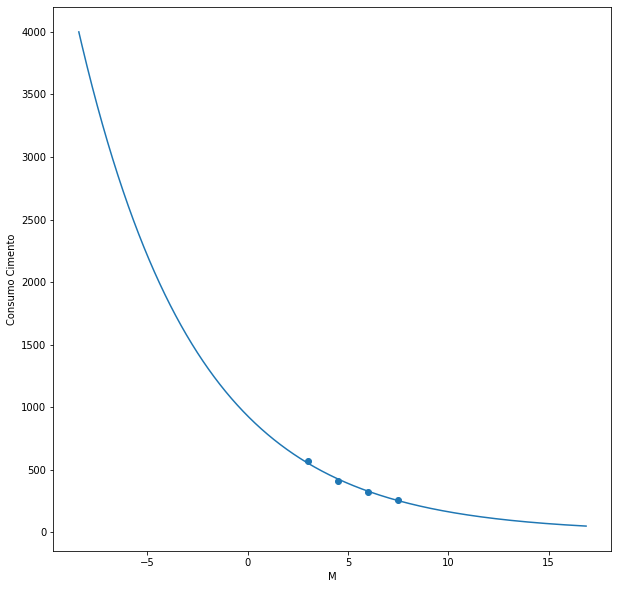

In [ ]:
yfit = np.arange(50,4000,0.001)
xfit = constantesC[0][0] + constantesC[0][1]*np.log(yfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(m,CC)
plt.xlabel('M')
plt.ylabel('Consumo Cimento')

Text(0, 0.5, 'Consumo Cimento')

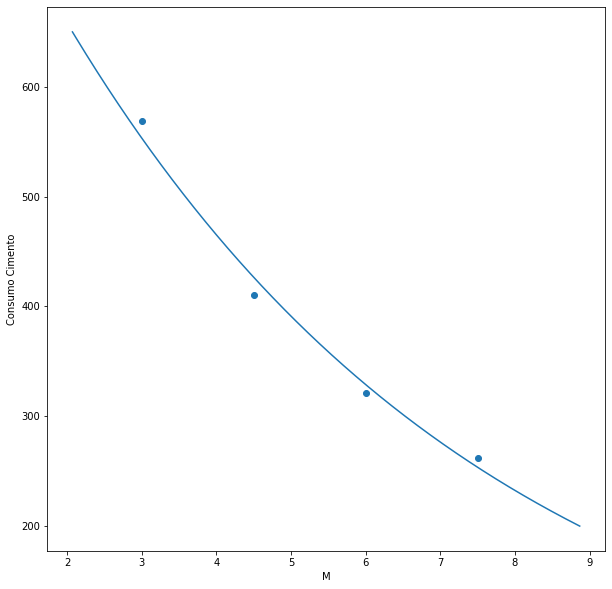

In [ ]:
yzoomfit = np.arange(200,650,0.0002)
xzoomfit = constantesC[0][0] + constantesC[0][1]*np.log(yzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(m,CC)
plt.xlabel('M')
plt.ylabel('Consumo Cimento')

In [ ]:
CCfinal = np.zeros((4,2))
for i in range(0,8):
  CCfinal[i//2,i%2] = e**((-constantesC[0][0]+macfinalshape[i]) / constantesC[0][1])
  print(e**((-constantesC[0][0]+macfinalshape[i]) / constantesC[0][1]))

[350.94872959]
[385.07022887]
[385.07022887]
[422.50924042]
[422.50924042]
[463.58831417]
[508.66136045]
[508.66136045]


In [ ]:

#CCfinal = np.zeros((2,4))
#for i in range(0,8):
  #CCfinal[i%2,i//2] = constantesC[0][0] + constantesC[0][1]*np.log(macfinalshape[i])
  #print(constantesC[0][0] + constantesC[0][1]*np.log(macfinalshape[i]))

In [ ]:

ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}

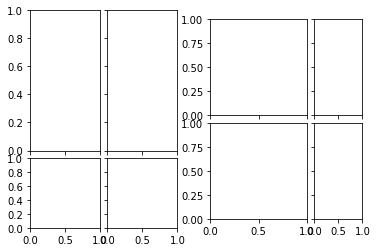

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure()

grid1 = ImageGrid(fig, 121, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [0, 1]:
    grid1[i].set_aspect(2)

grid2 = ImageGrid(fig, 122, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [1, 3]:
    grid2[i].set_aspect(2)

plt.show()

In [ ]:
Dadosac

array([0.41, 0.41, 0.54, 0.54, 0.68, 0.68, 0.83, 0.83])

In [ ]:
DadosRes

array([60.2, 58.9, 43.2, 41.5, 29.5, 31.3, 19.3, 21.3])

In [ ]:
MediaRes = np.sum(DadosRes)

In [ ]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
print(Soma)
soma1 = 0
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)

10.77418856189476
R2 =  0.9634397365831551


In [ ]:
for i in range(1,100000):
  if(56.1024/(1-np.cos(i*pi/180/100000))<408.5834/(2*np.sin(i*pi/180/100000))):
    print(56.1024/(1-np.cos(i*pi/180/100000)),408.5834/(2*np.sin(i*pi/180/100000)), i*pi/180/100000)
    break

3692.830958125033

1176.4690119112342

61.423835575723395

NameError: ignored

In [ ]:
Dadosac

array([0.41, 0.41, 0.54, 0.54, 0.68, 0.68, 0.83, 0.83])

In [ ]:
m_novo = 0.65/(0.65/(1+2.6435+2.98108)*0.9)-1

In [ ]:
Areia_nova = 0.55*(1+m_novo)-1

In [ ]:
Pedra_nova = m_novo - Areia_nova

In [ ]:
print(Pedra_nova,Areia_nova)

3.312289999999999 3.0483544444444446


In [ ]:

DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    
1000/((1/DadosCimento["MassaEspecifica"])+(Areia_nova/2.63)+(Pedra_nova/2.95)+0.65)

306.5685402636267

In [ ]:
import numpy as np

In [ ]:
-1.3325688073394506 +10.70336391437309*0.65

5.624617737003058

In [ ]:
1000/((1/2.75)+(2.41/2.63)+(3.03/2.85)+0.56)

344.4541422980938

In [ ]:
Finalac =Finalac/100
print(Finalac)

[[0.65 0.6 ]
 [0.6  0.55]
 [0.55 0.5 ]
 [0.45 0.45]]


In [ ]:
Finalac

array([[0.65, 0.6 ],
       [0.6 , 0.55],
       [0.55, 0.5 ],
       [0.45, 0.45]])

In [ ]:
macfinal

array([[5.62461774, 5.08944954],
       [5.08944954, 4.55428135],
       [4.55428135, 4.01911315],
       [3.48394495, 3.48394495]])

In [ ]:
Aditivo  = [0.002, 0.004, 0.006, 0.008, 0.01]
RedAgua = [0.08, 0.09, 0.11, 0.13, 0.16] 
MEaditivo = 1.2
Custoaditivo = 6

In [ ]:
H_original = Finalac/(1+macfinal)
print(H_original)

[[0.09811887 0.09853107]
 [0.09853107 0.09902271]
 [0.09902271 0.09961919]
 [0.10035806 0.10035806]]


array([[[0.00084302, 0.00084065],
        [0.00084065, 0.00083787],
        [0.00083787, 0.00083456],
        [0.00083055, 0.00083055]],

       [[0.00083385, 0.00083151],
        [0.00083151, 0.00082876],
        [0.00082876, 0.00082549],
        [0.00082152, 0.00082152]],

       [[0.00081553, 0.00081324],
        [0.00081324, 0.00081055],
        [0.00081055, 0.00080735],
        [0.00080347, 0.00080347]],

       [[0.0007972 , 0.00079496],
        [0.00079496, 0.00079234],
        [0.00079234, 0.0007892 ],
        [0.00078541, 0.00078541]],

       [[0.00076971, 0.00076755],
        [0.00076755, 0.00076501],
        [0.00076501, 0.00076199],
        [0.00075833, 0.00075833]]])

In [ ]:
H_novo = np.zeros((5,4,2))
for i in range(0,5):
  H_novo[i] = H_original * (1-RedAgua[i])
  print(H_novo[i])

[[0.09026936 0.09064859]
 [0.09064859 0.09110089]
 [0.09110089 0.09164966]
 [0.09232941 0.09232941]]
[[0.08928817 0.08966328]
 [0.08966328 0.09011067]
 [0.09011067 0.09065347]
 [0.09132583 0.09132583]]
[[0.08732579 0.08769266]
 [0.08769266 0.08813021]
 [0.08813021 0.08866108]
 [0.08931867 0.08931867]]
[[0.08536342 0.08572203]
 [0.08572203 0.08614976]
 [0.08614976 0.0866687 ]
 [0.08731151 0.08731151]]
[[0.08241985 0.0827661 ]
 [0.0827661  0.08317908]
 [0.08317908 0.08368012]
 [0.08430077 0.08430077]]


In [ ]:
macfinal

array([[5.62461774, 5.08944954],
       [5.08944954, 4.55428135],
       [4.55428135, 4.01911315],
       [3.48394495, 3.48394495]])

In [ ]:
m_novo = Finalac/H_novo - 1
print(m_novo)

[[[6.20067145 5.61896689]
  [5.61896689 5.03726233]
  [5.03726233 4.45555777]
  [3.87385321 3.87385321]]

 [[6.27979971 5.69170279]
  [5.69170279 5.10360587]
  [5.10360587 4.51550896]
  [3.92741204 3.92741204]]

 [[6.44339072 5.84207814]
  [5.84207814 5.24076556]
  [5.24076556 4.63945298]
  [4.0381404  4.0381404 ]]

 [[6.61450315 5.99936729]
  [5.99936729 5.38423143]
  [5.38423143 4.76909557]
  [4.15395972 4.15395972]]

 [[6.88644969 6.24934469]
  [6.24934469 5.6122397 ]
  [5.6122397  4.9751347 ]
  [4.33802971 4.33802971]]]


In [ ]:
Areia_nova = float(DdosExtras["TeorArgS"])*(1+m_novo)-1
print(Areia_nova)

[[[2.9603693  2.64043179]
  [2.64043179 2.32049428]
  [2.32049428 2.00055677]
  [1.68061927 1.68061927]]

 [[3.00388984 2.68043654]
  [2.68043654 2.35698323]
  [2.35698323 2.03352993]
  [1.71007662 1.71007662]]

 [[3.09386489 2.76314297]
  [2.76314297 2.43242106]
  [2.43242106 2.10169914]
  [1.77097722 1.77097722]]

 [[3.18797673 2.84965201]
  [2.84965201 2.51132729]
  [2.51132729 2.17300257]
  [1.83467784 1.83467784]]

 [[3.33754733 2.98713958]
  [2.98713958 2.63673183]
  [2.63673183 2.28632409]
  [1.93591634 1.93591634]]]


In [ ]:
Brita_nova = m_novo-Areia_nova
print(Brita_nova)

[[[3.24030215 2.9785351 ]
  [2.9785351  2.71676805]
  [2.71676805 2.455001  ]
  [2.19323394 2.19323394]]

 [[3.27590987 3.01126626]
  [3.01126626 2.74662264]
  [2.74662264 2.48197903]
  [2.21733542 2.21733542]]

 [[3.34952582 3.07893516]
  [3.07893516 2.8083445 ]
  [2.8083445  2.53775384]
  [2.26716318 2.26716318]]

 [[3.42652642 3.14971528]
  [3.14971528 2.87290414]
  [2.87290414 2.59609301]
  [2.31928187 2.31928187]]

 [[3.54890236 3.26220511]
  [3.26220511 2.97550786]
  [2.97550786 2.68881062]
  [2.40211337 2.40211337]]]


In [ ]:
CCAditivo = 1000/((1/DadosCimento["MassaEspecifica"]) + (Areia_nova/2.63) + (Brita_nova/2.85) + Finalac)

In [ ]:
CCfinal

array([[350.94872959, 385.07022887],
       [385.07022887, 422.50924042],
       [422.50924042, 463.58831417],
       [508.66136045, 508.66136045]])

In [ ]:
CCAditivo

array([[[308.39479967, 335.6719036 ],
        [335.6719036 , 368.2424516 ],
        [368.2424516 , 407.81290625],
        [456.91152815, 456.91152815]],

       [[305.65724172, 332.69068086],
        [332.69068086, 364.96995201],
        [364.96995201, 404.18605254],
        [452.84426732, 452.84426732]],

       [[300.14890034, 326.69213573],
        [326.69213573, 358.38543513],
        [358.38543513, 396.88869515],
        [444.66099949, 444.66099949]],

       [[294.59580844, 320.64497007],
        [320.64497007, 351.74769562],
        [351.74769562, 389.5325517 ],
        [436.41208505, 436.41208505]],

       [[286.1810631 , 311.48175708],
        [311.48175708, 341.6898737 ],
        [341.6898737 , 378.38654936],
        [423.91388755, 423.91388755]]])

In [ ]:
Finalac

array([[0.65, 0.6 ],
       [0.6 , 0.55],
       [0.55, 0.5 ],
       [0.45, 0.45]])

In [ ]:
DadosCimento["MassaEspecifica"]

3.03

In [ ]:
CCfinal

array([[350.94872959, 385.07022887],
       [385.07022887, 422.50924042],
       [422.50924042, 463.58831417],
       [508.66136045, 508.66136045]])

In [ ]:
Finalac

array([[0.0065, 0.006 ],
       [0.006 , 0.0055],
       [0.0055, 0.005 ],
       [0.0045, 0.0045]])

In [ ]:
Custo_Original = CCfinal*DadosCimento['Custo']/1000 + CCfinal*Areia*DdosExtras['Areia']['Custo']*(1+DdosExtras['Areia']['Inchamento'])/DdosExtras['Areia']['MU']+CCfinal*Pedra/DdosExtras['Brita']['MU']*DdosExtras['Brita']['Custo']
Custo_Original

array([[311.1539077 , 330.61786473],
       [330.61786473, 350.92531218],
       [350.92531218, 372.05627674],
       [393.97892776, 393.97892776]])

In [ ]:
CCfinal

array([[350.94872959, 385.07022887],
       [385.07022887, 422.50924042],
       [422.50924042, 463.58831417],
       [508.66136045, 508.66136045]])

In [ ]:
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

In [ ]:
CCfinal*Pedra/DdosExtras['Brita']['MU']*DdosExtras['Brita']['Custo']

array([[44.73430544, 45.11845092],
       [45.11845092, 45.15442198],
       [45.15442198, 44.77088378],
       [43.8859215 , 43.8859215 ]])

In [ ]:
CCfinal*Areia/DdosExtras['Areia']['MU']*DdosExtras['Areia']['Custo']*(1+DdosExtras['Areia']['Inchamento'])

array([[55.85036451, 54.45727649],
       [54.45727649, 52.26534595],
       [52.26534595, 49.13240445],
       [44.89618999, 44.89618999]])

In [ ]:
Pedra

array([[2.98107798, 2.74025229],
       [2.74025229, 2.49942661],
       [2.49942661, 2.25860092],
       [2.01777523, 2.01777523]])

In [ ]:
CCfinal

array([[350.94872959, 385.07022887],
       [385.07022887, 422.50924042],
       [422.50924042, 463.58831417],
       [508.66136045, 508.66136045]])

In [ ]:
Custocomaditivo = np.zeros((5,4,2))
for i in range(0,5):
  Custocomaditivo[i] =CCAditivo[i]*6*Aditivo[i] + CCAditivo[i]*DadosCimento['Custo']/1000 + CCAditivo[i]*Areia_nova[i]*DdosExtras['Areia']['Custo']*(1+DdosExtras['Areia']['Inchamento'])/DdosExtras['Areia']['MU']+CCAditivo[i]*Brita_nova[i]/DdosExtras['Brita']['MU']*DdosExtras['Brita']['Custo']

In [ ]:
Custocomaditivo

array([[[286.42632157, 301.53811466],
        [301.53811466, 319.58252961],
        [319.58252961, 341.50496407],
        [368.70610012, 368.70610012]],

       [[288.81783724, 304.11916231],
        [304.11916231, 322.38970564],
        [322.38970564, 344.58659665],
        [372.12786352, 372.12786352]],

       [[289.78529029, 305.12791565],
        [305.12791565, 323.44740128],
        [323.44740128, 345.70320713],
        [373.31674245, 373.31674245]],

       [[290.59806744, 305.96793775],
        [305.96793775, 324.31957857],
        [324.31957857, 346.61389828],
        [374.27437955, 374.27437955]],

       [[289.80598097, 305.03819431],
        [305.03819431, 323.22490799],
        [323.22490799, 345.31804081],
        [372.72764977, 372.72764977]]])

In [ ]:
Aditivo

[0.002, 0.004, 0.006, 0.008, 0.01]

array([[[2.9603693 , 2.64043179],
        [2.64043179, 2.32049428],
        [2.32049428, 2.00055677],
        [1.68061927, 1.68061927]],

       [[3.00388984, 2.68043654],
        [2.68043654, 2.35698323],
        [2.35698323, 2.03352993],
        [1.71007662, 1.71007662]],

       [[3.09386489, 2.76314297],
        [2.76314297, 2.43242106],
        [2.43242106, 2.10169914],
        [1.77097722, 1.77097722]],

       [[3.18797673, 2.84965201],
        [2.84965201, 2.51132729],
        [2.51132729, 2.17300257],
        [1.83467784, 1.83467784]],

       [[3.33754733, 2.98713958],
        [2.98713958, 2.63673183],
        [2.63673183, 2.28632409],
        [1.93591634, 1.93591634]]])